[Data Source](https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_19_india.csv)

In [1]:
import pandas as pd
import numpy as np
import os
import tweepy
from tqdm.notebook import tqdm

In [2]:
covidfiles=os.listdir("../../WorldData")
covidfiles

['covid_19_data.csv',
 'time_series_covid_19_deaths_US.csv',
 'COVID19_line_list_data.csv',
 'time_series_covid_19_deaths.csv',
 'time_series_covid_19_confirmed_US.csv',
 'COVID19_open_line_list.csv',
 'time_series_covid_19_confirmed.csv',
 'time_series_covid_19_recovered.csv']

In [3]:
covid=pd.read_csv("../../WorldData/"+covidfiles[0])
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
covidindia=covid[covid['Country/Region']=="India"]
covidindia.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0


In [5]:
covidindia['ObservationDate']=pd.to_datetime(covidindia['ObservationDate'])

<ipython-input-5-3cadfa017a15>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covidindia['ObservationDate']=pd.to_datetime(covidindia['ObservationDate'])


In [6]:
march_to_april=covidindia[(covidindia['ObservationDate'].dt.month>=3) & (covidindia['ObservationDate'].dt.month<5)]
march_to_april.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2895,2896,2020-03-01,NaN,India,2020-02-16T07:43:02,3.0,0.0,3.0
3016,3017,2020-03-02,NaN,India,2020-03-02T22:33:09,5.0,0.0,3.0
3162,3163,2020-03-03,NaN,India,2020-03-02T22:33:09,5.0,0.0,3.0
3288,3289,2020-03-04,NaN,India,2020-03-04T12:33:03,28.0,0.0,3.0
3451,3452,2020-03-05,NaN,India,2020-03-05T13:53:03,30.0,0.0,3.0


In [14]:
march_to_april

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
2895,2896,2020-03-01,NaN,India,2020-02-16T07:43:02,3.0,0.0,3.0
3016,3017,2020-03-02,NaN,India,2020-03-02T22:33:09,5.0,0.0,3.0
3162,3163,2020-03-03,NaN,India,2020-03-02T22:33:09,5.0,0.0,3.0
3288,3289,2020-03-04,NaN,India,2020-03-04T12:33:03,28.0,0.0,3.0
3451,3452,2020-03-05,NaN,India,2020-03-05T13:53:03,30.0,0.0,3.0
...,...,...,...,...,...,...,...,...
18753,18754,2020-04-26,NaN,India,2020-04-27 02:31:20,27890.0,881.0,6523.0
19072,19073,2020-04-27,NaN,India,2020-04-28 02:31:20,29451.0,939.0,7137.0
19394,19395,2020-04-28,NaN,India,2020-04-29 02:32:29,31324.0,1008.0,7747.0
19716,19717,2020-04-29,NaN,India,2020-04-30 02:32:27,33062.0,1079.0,8437.0


In [7]:
nov_to_dec=covidindia[(covidindia['ObservationDate'].dt.month>=11)]
nov_to_dec.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
145473,145474,2020-11-01,Andaman and Nicobar Islands,India,2020-11-02 05:25:04,4340.0,60.0,4112.0
145474,145475,2020-11-01,Andhra Pradesh,India,2020-11-02 05:25:04,825966.0,6706.0,795592.0
145490,145491,2020-11-01,Arunachal Pradesh,India,2020-11-02 05:25:04,14881.0,37.0,13073.0
145491,145492,2020-11-01,Assam,India,2020-11-02 05:25:04,206517.0,931.0,196784.0
145513,145514,2020-11-01,Bihar,India,2020-11-02 05:25:04,216707.0,1097.0,208644.0


<h2>March To April </h2>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
def check_null(name):
    for i in name.columns:
        print(i,":",name[str(i)].isna().sum())

In [10]:
check_null(march_to_april)

SNo : 0
ObservationDate : 0
Province/State : 61
Country/Region : 0
Last Update : 0
Confirmed : 0
Deaths : 0
Recovered : 0


In [13]:
marchaprilstats=march_to_april[['ObservationDate','Confirmed','Deaths','Recovered']].groupby(['ObservationDate']).agg(['sum'])
marchaprilstats.head()

,Confirmed,Deaths,Recovered
,sum,sum,sum
ObservationDate,,,
2020-03-01,3.0,0.0,3.0
2020-03-02,5.0,0.0,3.0
2020-03-03,5.0,0.0,3.0
2020-03-04,28.0,0.0,3.0
2020-03-05,30.0,0.0,3.0


In [15]:
marchaprilstats.reset_index(level=0,inplace=True)

In [17]:
dates,confirmed,death,recovered=marchaprilstats.columns

In [60]:
confirm=marchaprilstats.sort_values(by=confirmed, ascending=False)

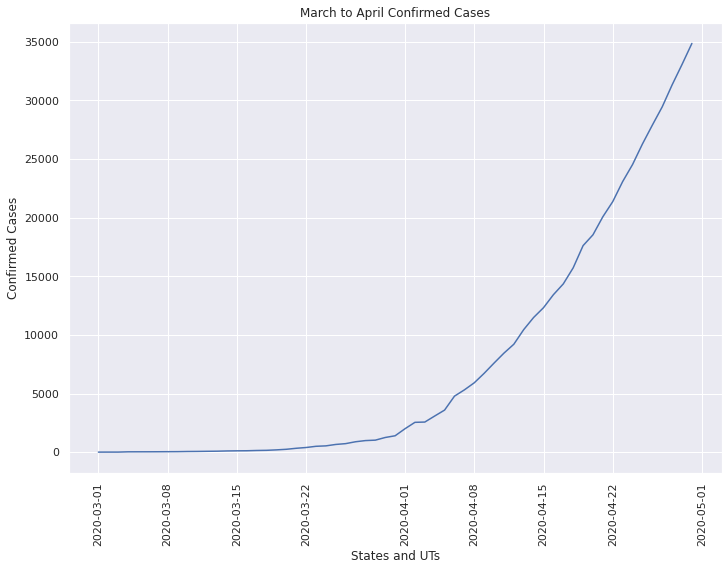

In [61]:
from matplotlib.pyplot import figure
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.lineplot(confirm[dates],confirm[confirmed])
plt.title("March to April Confirmed Cases")
plt.ylabel("Confirmed Cases")
plt.xlabel("States and UTs")
plt.xticks(rotation=90)
plt.savefig("./MarchAprilConfirmedCases.png")
plt.show()

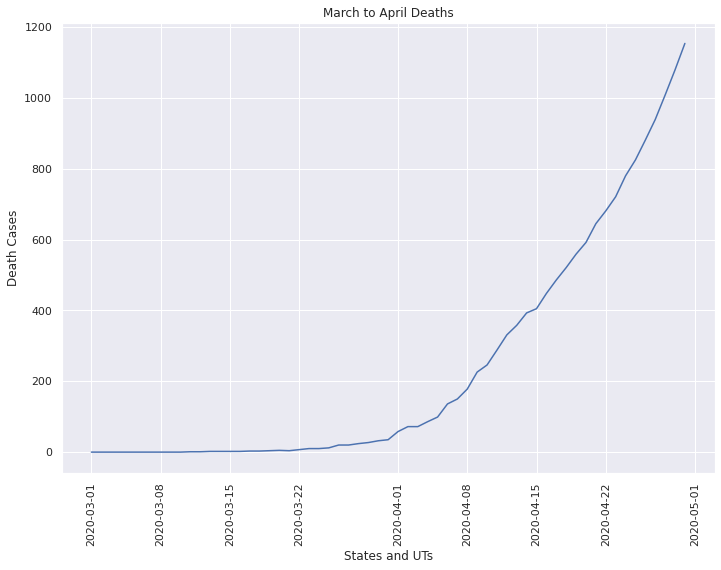

In [62]:
deaths=marchaprilstats.sort_values(by=death, ascending=False)
from matplotlib.pyplot import figure
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.lineplot(deaths[dates],deaths[death])
plt.title("March to April Deaths")
plt.ylabel("Death Cases")
plt.xlabel("States and UTs")
plt.xticks(rotation=90)
#plt.savefig("./MarchAprilConfirmedCases.png")
plt.show()

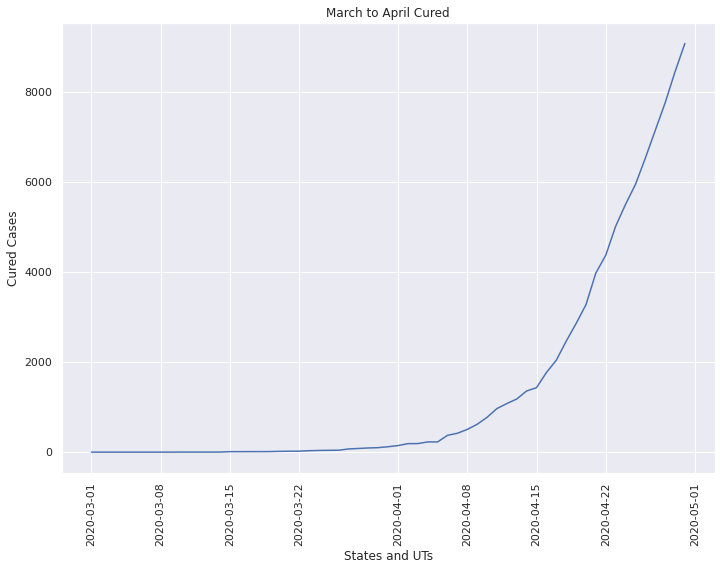

In [63]:
cure=marchaprilstats.sort_values(by=recovered, ascending=False)
from matplotlib.pyplot import figure
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.lineplot(cure[dates],cure[recovered])
plt.title("March to April Cured")
plt.ylabel("Cured Cases")
plt.xlabel("States and UTs")
plt.xticks(rotation=90)
#plt.legend[]
#plt.savefig("./MarchAprilConfirmedCases.png")
plt.show()

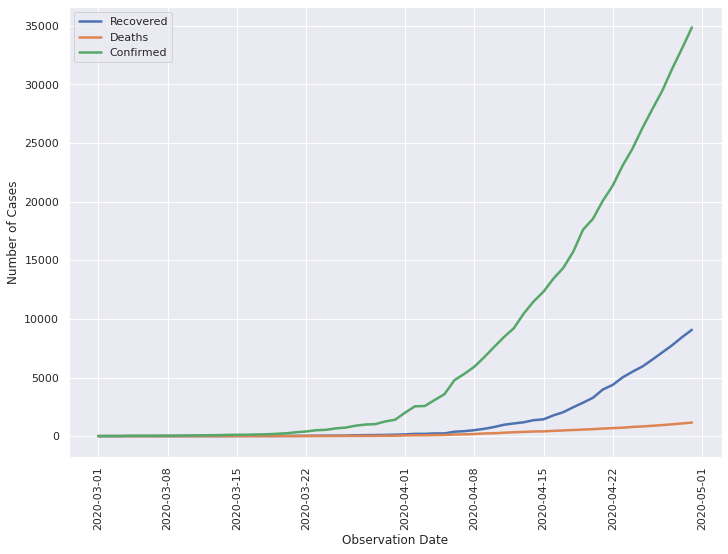

In [64]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(cure[dates],cure[recovered],linewidth=2.5)
sns.lineplot(deaths[dates],deaths[death],linewidth=2.5)
sns.lineplot(confirm[dates],confirm[confirmed],linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(['Recovered','Deaths','Confirmed'])
plt.xlabel("Observation Date")
plt.ylabel("Number of Cases")
plt.show()

<h2> November to December </h2>

In [38]:
check_null(nov_to_dec)

SNo : 0
ObservationDate : 0
Province/State : 0
Country/Region : 0
Last Update : 0
Confirmed : 0
Deaths : 0
Recovered : 0


In [39]:
nov_to_dec.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
172404,172405,2020-12-06,Tripura,India,2020-12-07 05:26:14,32897.0,373.0,32110.0
172419,172420,2020-12-06,Unknown,India,2020-12-07 05:26:14,0.0,0.0,0.0
172429,172430,2020-12-06,Uttar Pradesh,India,2020-12-07 05:26:14,554944.0,7924.0,524860.0
172430,172431,2020-12-06,Uttarakhand,India,2020-12-07 05:26:14,77997.0,1285.0,71489.0
172457,172458,2020-12-06,West Bengal,India,2020-12-07 05:26:14,502840.0,8723.0,470223.0


In [44]:
novdecstats=nov_to_dec[['ObservationDate','Confirmed','Deaths','Recovered']].groupby(['ObservationDate']).agg(['sum'])
novdecstats.head()

,Confirmed,Deaths,Recovered
,sum,sum,sum
ObservationDate,,,
2020-11-01,8229313.0,122607.0,7544798.0
2020-11-02,8267623.0,123097.0,7603121.0
2020-11-03,8313876.0,123611.0,7656478.0
2020-11-04,8364086.0,124315.0,7711809.0
2020-11-05,8411724.0,124985.0,7765966.0


In [45]:
novdecstats.reset_index(level=0,inplace=True)
dates,confirmed,death,recovered=novdecstats.columns

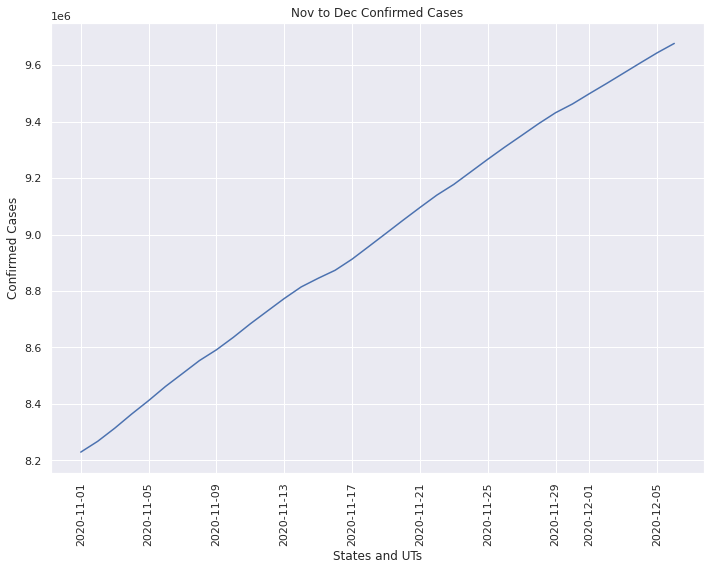

In [48]:
confirm=novdecstats.sort_values(by=confirmed, ascending=False)
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.lineplot(confirm[dates],confirm[confirmed])
plt.title("Nov to Dec Confirmed Cases")
plt.ylabel("Confirmed Cases")
plt.xlabel("States and UTs")
plt.xticks(rotation=90)
#plt.savefig("./MarchAprilConfirmedCases.png")
plt.show()

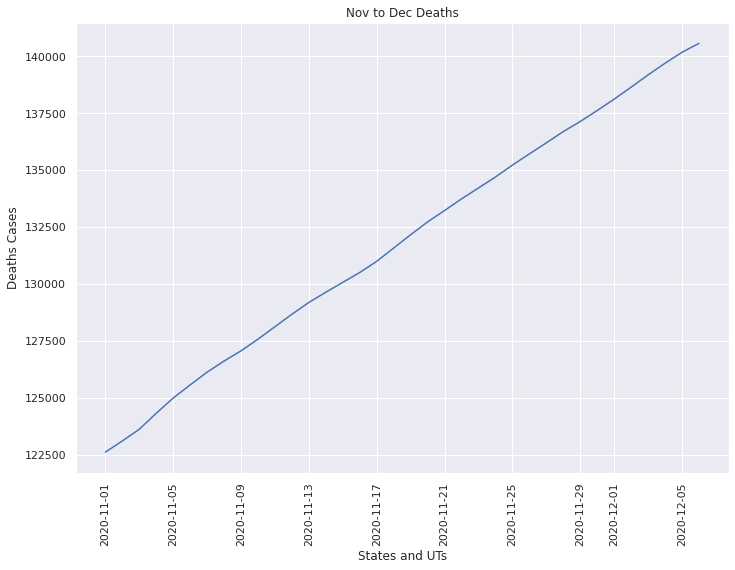

In [49]:
deaths=novdecstats.sort_values(by=death, ascending=False)
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.lineplot(deaths[dates],deaths[death])
plt.title("Nov to Dec Deaths")
plt.ylabel("Deaths Cases")
plt.xlabel("States and UTs")
plt.xticks(rotation=90)
#plt.savefig("./MarchAprilConfirmedCases.png")
plt.show()

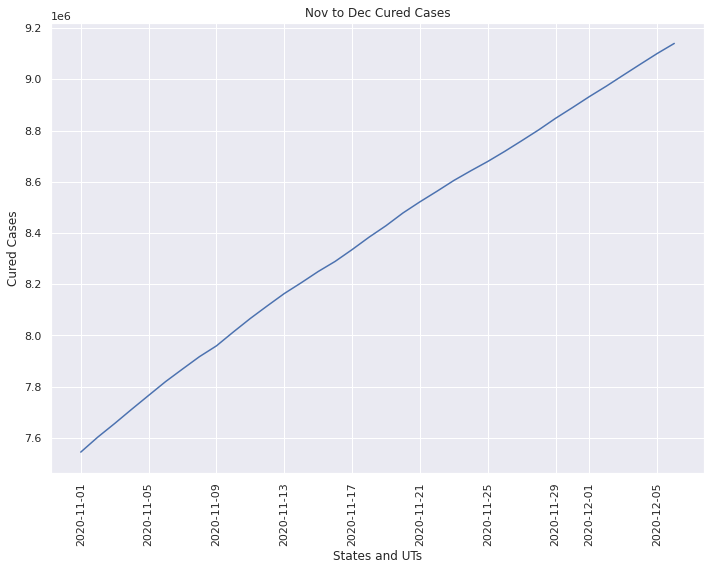

In [53]:
cure=novdecstats.sort_values(by=recovered, ascending=False)
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
g=sns.lineplot(cure[dates],cure[recovered])
plt.title("Nov to Dec Cured Cases")
plt.ylabel("Cured Cases")
plt.xlabel("States and UTs")
plt.xticks(rotation=90)
#plt.savefig("./MarchAprilConfirmedCases.png")
plt.show()

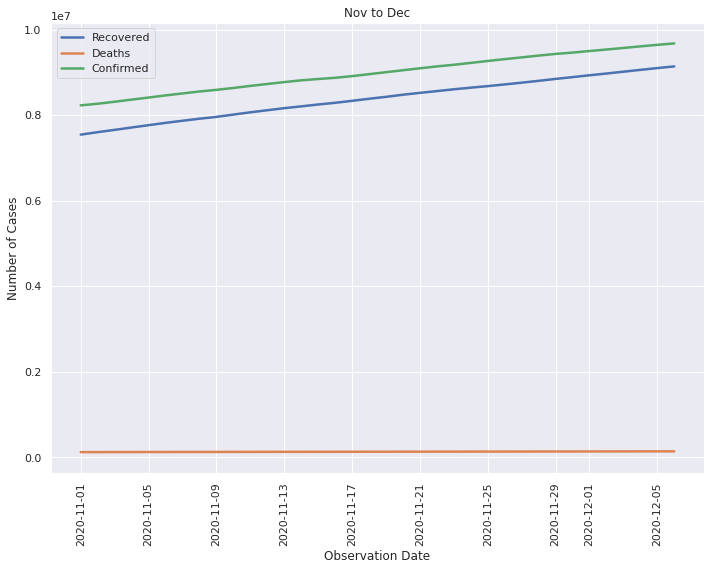

In [58]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.lineplot(cure[dates],cure[recovered],linewidth=2.5)
sns.lineplot(deaths[dates],deaths[death],linewidth=2.5)
sns.lineplot(confirm[dates],confirm[confirmed],linewidth=2.5)
plt.xticks(rotation=90)
plt.legend(['Recovered','Deaths','Confirmed'])
plt.xlabel("Observation Date")
plt.ylabel("Number of Cases")
plt.title("Nov to Dec")
plt.show()